<a href="https://colab.research.google.com/github/YUVARAJAN-P/Drug-Induced-Mental-Health-Disorders-Diagnosis-System-using-Machine-Learning/blob/main/Drug_Induced_Mental_Health_prediction_YUVARAJAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Drug-Induced Mental Health Disorders Diagnosis System using Machine Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mental_Health_drugInduced.csv to Mental_Health_drugInduced.csv


In [ ]:
train_df = pd.read_csv('Mental_Health_drugInduced.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   TimeStamp                    1259 non-null   object
 1   Age                          1259 non-null   int64 
 2   Gender                       1259 non-null   object
 3   Country                      1259 non-null   object
 4   Place                        744 non-null    object
 5   Family_history               1257 non-null   object
 6   Treatment                    1259 non-null   object
 7   Depression                   1259 non-null   object
 8   Lonely_feel                  995 non-null    object
 9   Duration_of_use(days)        1259 non-null   object
 10  Drug_used    

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total   Percent
Comments_by_Patients          1096  0.870532
Place                          515  0.409055
Lonely_feel                    264  0.209690
Family_history                   2  0.001589
anonymity                        0  0.000000
Diagnosis                        0  0.000000
Consquences                      0  0.000000
mental_vs_physical               0  0.000000
phys_health_interview            0  0.000000
mental_health_interview          0  0.000000
Bipolar_disorder                 0  0.000000
Schizophrenia                    0  0.000000
Physical_health_Consquences      0  0.000000
Mental_health_Consquences        0  0.000000
Drug_addiction                   0  0.000000
TimeStamp                        0  0.000000
seek_help                        0  0.000000
Age                              0  0.000000
Psychosis                        0  0.000000
Substance_Abuse                  0  0.000000
Drug_used                        0  0.000000
Duration_o

In [ ]:
#dealing with missing data


train_df.drop(['TimeStamp'], axis= 1, inplace=True)
train_df.drop(['Place'], axis= 1, inplace=True)
train_df.drop(['Comments_by_Patients'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,Family_history,Treatment,Depression,Lonely_feel,Duration_of_use(days),Drug_used,Substance_Abuse,...,Drug_addiction,Mental_health_Consquences,Physical_health_Consquences,Schizophrenia,Bipolar_disorder,mental_health_interview,phys_health_interview,mental_vs_physical,Consquences,Diagnosis
0,37,Female,Germany,Yes,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,Yes,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Yes,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,Israel,Yes,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,Yes


In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'Place', 'Family_history', 'Treatment', 'Depression',
                 'Lonely_feel', 'Duration_of_use(days)', 'Drug_used', 'Substance_Abuse', 'Drug_addiction', 'Mental_health_Consequence',
                 'Phys_health_Consequence', 'Schizophrenia', 'Bipolar_disorder', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'Consequences', 'anonymity', 'Psychosis', 'Wellness_treatment',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

Error: Feature Wellness_treat not recognized.
Error: Feature Mental_health_Consquences not recognized.
Error: Feature Physical_health_Consquences not recognized.
Error: Feature Consquences not recognized.
Error: Feature Diagnosis not recognized.


,Age,Gender,Country,Family_history,Treatment,Depression,Lonely_feel,Duration_of_use(days),Drug_used,Substance_Abuse,...,Drug_addiction,Mental_health_Consquences,Physical_health_Consquences,Schizophrenia,Bipolar_disorder,mental_health_interview,phys_health_interview,mental_vs_physical,Consquences,Diagnosis
0,37,Female,Germany,Yes,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,Yes,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Yes,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,Israel,Yes,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,Yes


In [ ]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'Male' 'male' 'M' 'Male-ish' 'maile' 'm' 'Trans-female'
 'Cis Female' 'female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f'
 'Mal' 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make'
 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Man'
 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)'
 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [ ]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [ ]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

<ipython-input-12-becada5b4f8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
<ipython-input-12-becada5b4f8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'] = s
<ipython-input-12-becada5b4f8f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:

#Replace "NaN" string from defaultString
train_df['Country'] = train_df['Country'].replace([defaultString], 'No')
print(train_df['Country'].unique())

['Germany' 'United States' 'Canada' 'United Kingdom' 'Israel' 'Russia'
 'Austria' 'Bulgaria' 'Australia' 'Sweden' 'France' 'Ireland' 'Italy'
 'Portugal' 'Netherlands' 'Switzerland' 'Poland' 'Mexico' 'Brazil'
 'Slovenia' 'Costa Rica' 'India' 'South Africa' 'Colombia' 'Latvia'
 'Romania' 'Belgium' 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']


<ipython-input-17-4dd8a5092b2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Country'] = train_df['Country'].replace([defaultString], 'No')


In [ ]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

In [ ]:
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,Family_history,Treatment,Depression,Lonely_feel,Duration_of_use(days),Drug_used,Substance_Abuse,Psychosis,...,Mental_health_Consquences,Physical_health_Consquences,Schizophrenia,Bipolar_disorder,mental_health_interview,phys_health_interview,mental_vs_physical,Consquences,Diagnosis,age_range
0,19,0,2,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,2,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,2,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,2,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,2,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,1,2


In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total  Percent
Age                              0      0.0
Gender                           0      0.0
Diagnosis                        0      0.0
Consquences                      0      0.0
mental_vs_physical               0      0.0
phys_health_interview            0      0.0
mental_health_interview          0      0.0
Bipolar_disorder                 0      0.0
Schizophrenia                    0      0.0
Physical_health_Consquences      0      0.0
Mental_health_Consquences        0      0.0
Drug_addiction                   0      0.0
anonymity                        0      0.0
seek_help                        0      0.0
Wellness_treat                   0      0.0
Psychosis                        0      0.0
Substance_Abuse                  0      0.0
Drug_used                        0      0.0
Duration_of_use(days)            0      0.0
Lonely_feel                      0      0.0
Depression                       0      0.0
Treatment                       

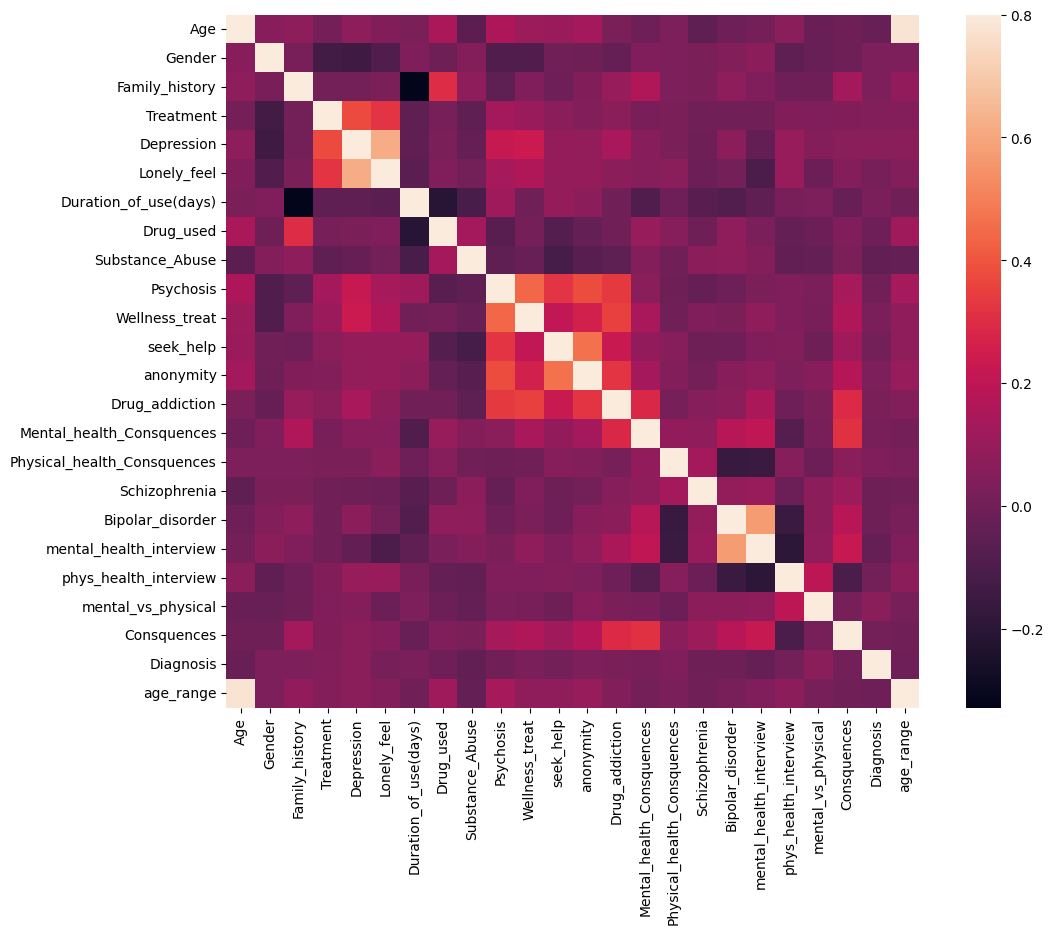

In [ ]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Text(0.5, 1.0, 'Diagnosed peoples by Drug-Induced Mental Health')

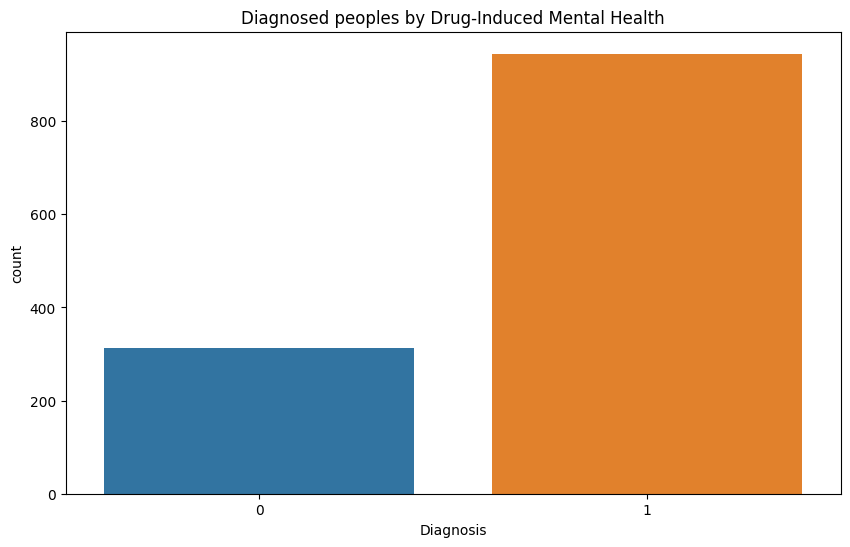

In [ ]:
plt.figure(figsize=(10,6))
labels = labelDict['label_Gender']
g = sns.countplot(x="Diagnosis", data=train_df)


plt.title('Diagnosed peoples by Drug-Induced Mental Health')

In [ ]:
# define X and y
feature_cols = ['Age', 'Gender', 'Family_history', 'Substance_Abuse', 'Psychosis', 'anonymity', 'Drug_addiction', 'Depression']
X = train_df[feature_cols]
y = train_df.Diagnosis

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

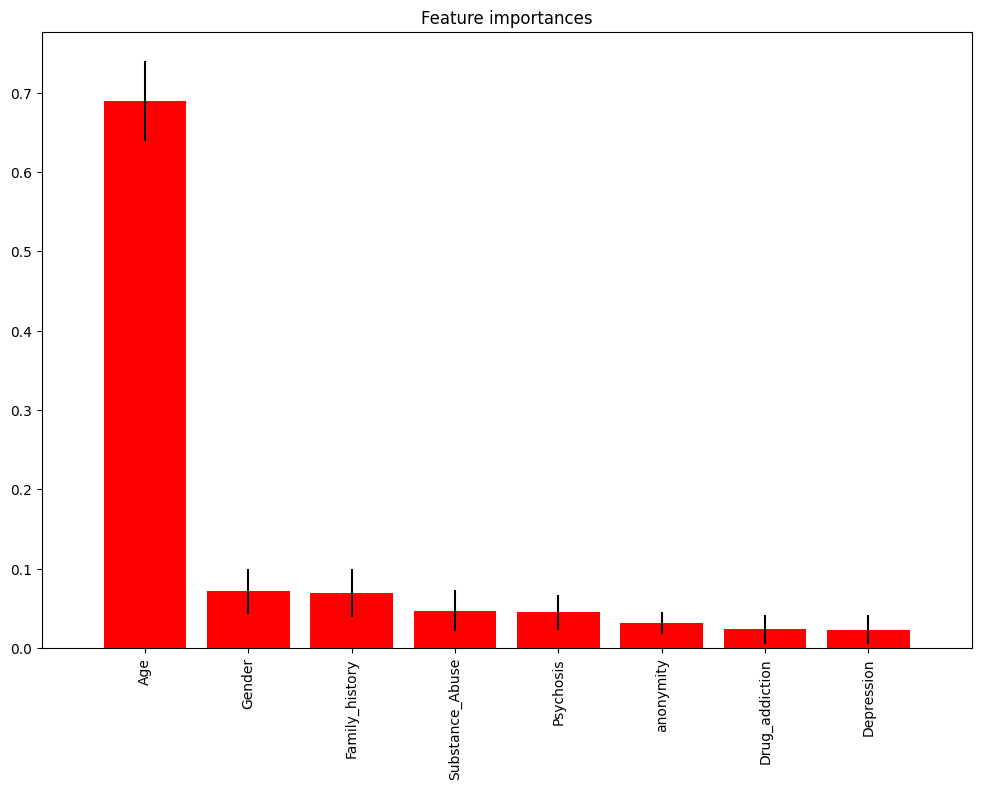

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of Diagnosis')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    
    # newly introduced  
    from sklearn.preprocessing import binarize
    y_pred_class = binarize(y_pred_prob, threshold=0.3)[0]

    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
 
    
    return accuracy

In [ ]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [ ]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100


Accuracy: 0.7248677248677249
Null accuracy:
 1    274
0    104
Name: Diagnosis, dtype: int64
Percentage of ones: 0.7248677248677249
Percentage of zeros: 0.2751322751322751
True: [1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1]
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


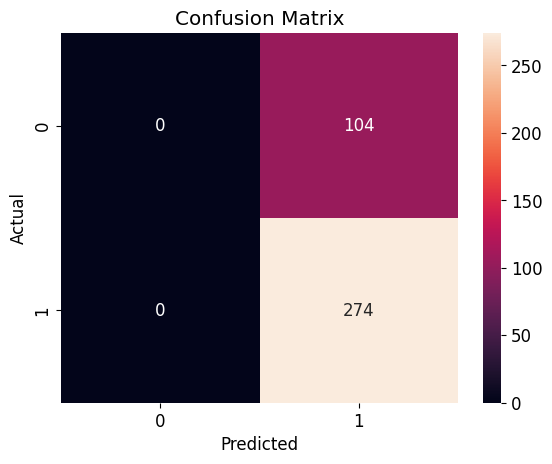

Classification Accuracy: 0.7248677248677249
Classification Error: 0.2751322751322751
False Positive Rate: 1.0
Precision: 0.7248677248677249
AUC Score: 0.5
Cross-validated AUC: 0.5222568227793231
First 10 predicted responses:
 [1 1 1 1 1 1 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.31818928 0.68181072]
 [0.2719131  0.7280869 ]
 [0.2926161  0.7073839 ]
 [0.27106707 0.72893293]
 [0.26855318 0.73144682]
 [0.32208525 0.67791475]
 [0.18132459 0.81867541]
 [0.28394903 0.71605097]
 [0.22003132 0.77996868]
 [0.2309502  0.7690498 ]]
First 10 predicted probabilities:
 [[0.68181072]
 [0.7280869 ]
 [0.7073839 ]
 [0.72893293]
 [0.73144682]
 [0.67791475]
 [0.81867541]
 [0.71605097]
 [0.77996868]
 [0.7690498 ]]


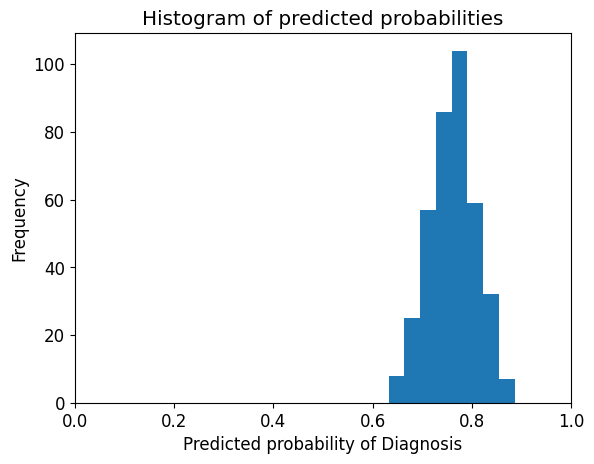

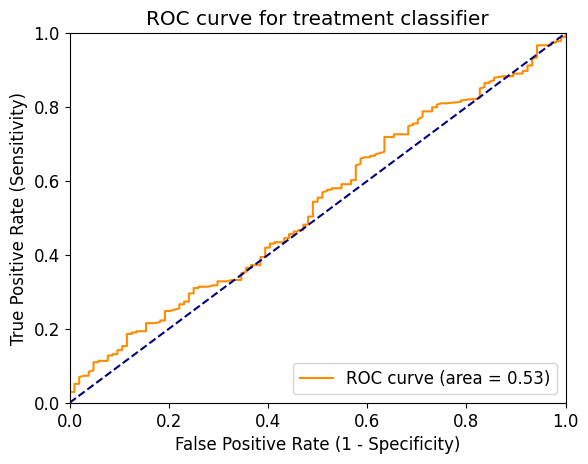

[[  0 104]
 [  0 274]]


In [ ]:
logisticRegression()

In [ ]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.7517904761904761
Rand. Best Params:  {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 8}
[0.753, 0.753, 0.752, 0.753, 0.752, 0.753, 0.752, 0.754, 0.754, 0.752, 0.751, 0.752, 0.753, 0.753, 0.752, 0.753, 0.752, 0.753, 0.752, 0.753]
Accuracy: 0.7248677248677249
Null accuracy:
 1    274
0    104
Name: Diagnosis, dtype: int64
Percentage of ones: 0.7248677248677249
Percentage of zeros: 0.2751322751322751
True: [1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1]
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


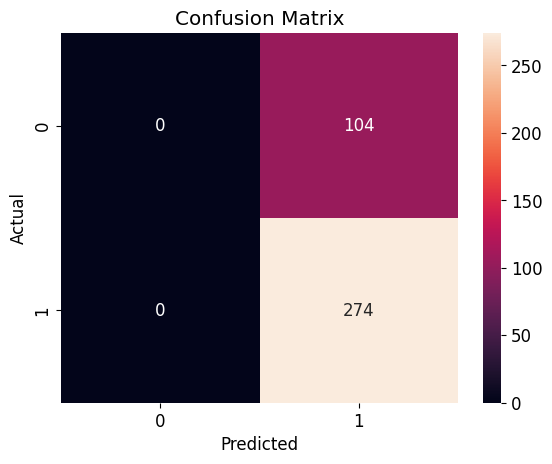

Classification Accuracy: 0.7248677248677249
Classification Error: 0.2751322751322751
False Positive Rate: 1.0
Precision: 0.7248677248677249
AUC Score: 0.5
Cross-validated AUC: 0.5119618425568038
First 10 predicted responses:
 [1 1 1 1 1 1 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.36535821 0.63464179]
 [0.17640615 0.82359385]
 [0.18120319 0.81879681]
 [0.24022053 0.75977947]
 [0.17788089 0.82211911]
 [0.28867458 0.71132542]
 [0.14413258 0.85586742]
 [0.16094215 0.83905785]
 [0.28102403 0.71897597]
 [0.16240861 0.83759139]]
First 10 predicted probabilities:
 [[0.63464179]
 [0.82359385]
 [0.81879681]
 [0.75977947]
 [0.82211911]
 [0.71132542]
 [0.85586742]
 [0.83905785]
 [0.71897597]
 [0.83759139]]


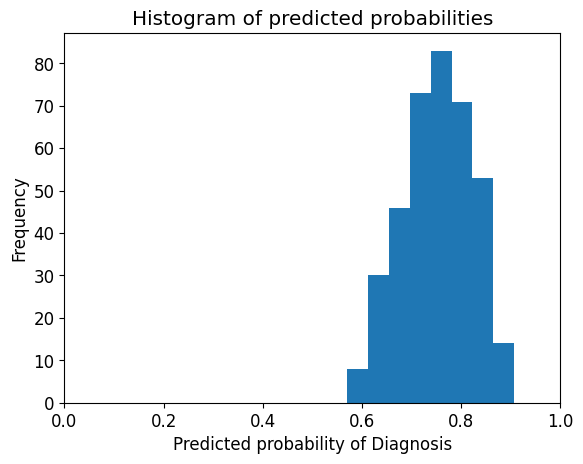

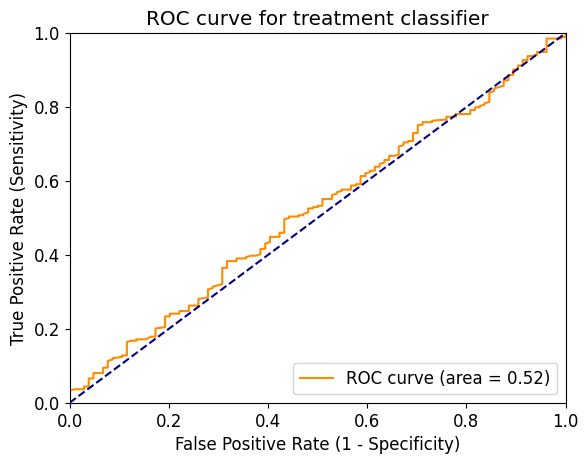

[[  0 104]
 [  0 274]]


In [ ]:
randomForest()

In [ ]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100

Rand. Best Score:  0.7502031746031745
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 29}
[0.746, 0.741, 0.733, 0.741, 0.75, 0.746, 0.745, 0.75, 0.75, 0.75, 0.745, 0.75, 0.75, 0.749, 0.75, 0.75, 0.75, 0.744, 0.749, 0.744]
Accuracy: 0.7248677248677249
Null accuracy:
 1    274
0    104
Name: Diagnosis, dtype: int64
Percentage of ones: 0.7248677248677249
Percentage of zeros: 0.2751322751322751
True: [1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1]
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


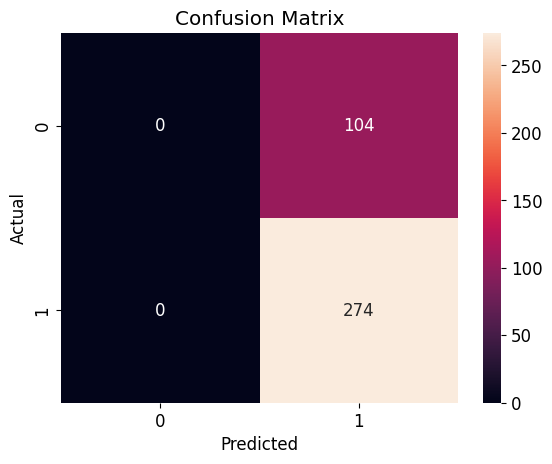

Classification Accuracy: 0.7248677248677249
Classification Error: 0.2751322751322751
False Positive Rate: 1.0
Precision: 0.7248677248677249
AUC Score: 0.5
Cross-validated AUC: 0.5115586336831268
First 10 predicted responses:
 [1 1 1 1 1 1 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2962963  0.7037037 ]
 [0.18518519 0.81481481]
 [0.14814815 0.85185185]
 [0.22222222 0.77777778]
 [0.25925926 0.74074074]
 [0.18518519 0.81481481]
 [0.11111111 0.88888889]
 [0.11111111 0.88888889]
 [0.22222222 0.77777778]
 [0.14814815 0.85185185]]
First 10 predicted probabilities:
 [[0.7037037 ]
 [0.81481481]
 [0.85185185]
 [0.77777778]
 [0.74074074]
 [0.81481481]
 [0.88888889]
 [0.88888889]
 [0.77777778]
 [0.85185185]]


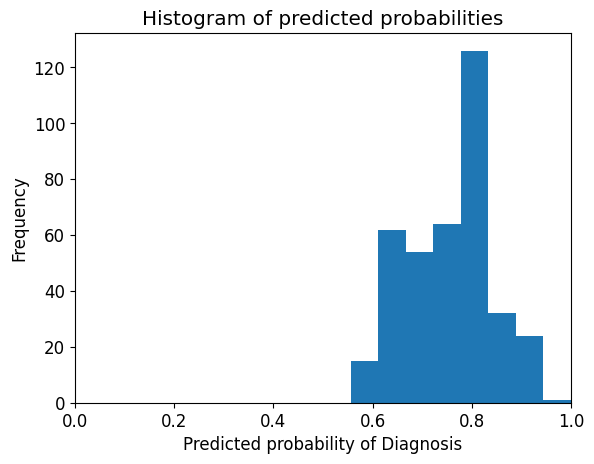

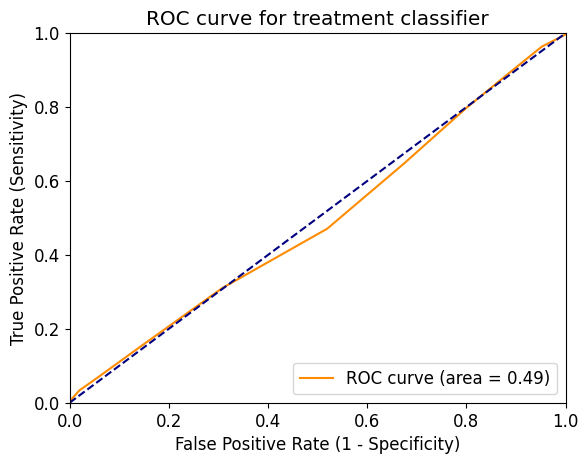

[[  0 104]
 [  0 274]]


In [ ]:
Knn()

In [ ]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,1
2,52,1
3,984,1
4,186,1
